# Multi-Armed Bandit Auction Platform - Main Demonstration

This notebook demonstrates our flexible multi-armed bandit auction platform that supports both UCB1 and Primal-Dual algorithms. The platform features a unified logging system and comprehensive testing coverage.

## Features
- **Flexible Algorithm Selection**: Switch between UCB1 and Primal-Dual algorithms
- **Unified Logging System**: Comprehensive logging instead of verbose print statements  
- **Complete Test Coverage**: Nearly 100% coverage for all base classes
- **Clean Architecture**: Modular design with separate base classes

In [20]:
from base_classes.setting import Setting
from base_classes.environment import Environment
import matplotlib.pyplot as plt
import numpy as np
import logging

In [21]:
# Enhanced logging configuration for better debugging
import logging

# Configure console output for logging
console_handler = logging.StreamHandler()
console_handler.setLevel(logging.INFO)
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
console_handler.setFormatter(formatter)

# Add handler to simulation logger
simulation_logger = logging.getLogger('market_simulation')
simulation_logger.addHandler(console_handler)
simulation_logger.setLevel(logging.INFO)

# Set random seed for reproducibility
seed = 2025
np.random.seed(seed)
print(f'Random seed: {seed}')

# We'll demonstrate both algorithms in this notebook
print("This demonstration will show both UCB1 and Primal-Dual algorithms")

Random seed: 2025
This demonstration will show both UCB1 and Primal-Dual algorithms


In [22]:
# Configure UCB1 simulation
ucb1_setting = Setting(
    T=1000, 
    n_products=3, 
    epsilon=0.33, 
    distribution='gaussian', 
    verbose='no',
    budget_constraint="lax", 
    algorithm="ucb1"  # Using UCB1 algorithm
)

print("Creating environment with UCB1 algorithm...")
ucb1_env = Environment(ucb1_setting)

Creating environment with UCB1 algorithm...


In [23]:
# Run UCB1 simulation
print("Running UCB1 simulation...")
ucb1_env.play_all_rounds()
print(f"UCB1 simulation completed. Final regret: {sum(ucb1_env.regrets):.4f}")

Running UCB1 simulation...
UCB1 simulation completed. Final regret: -457.8000


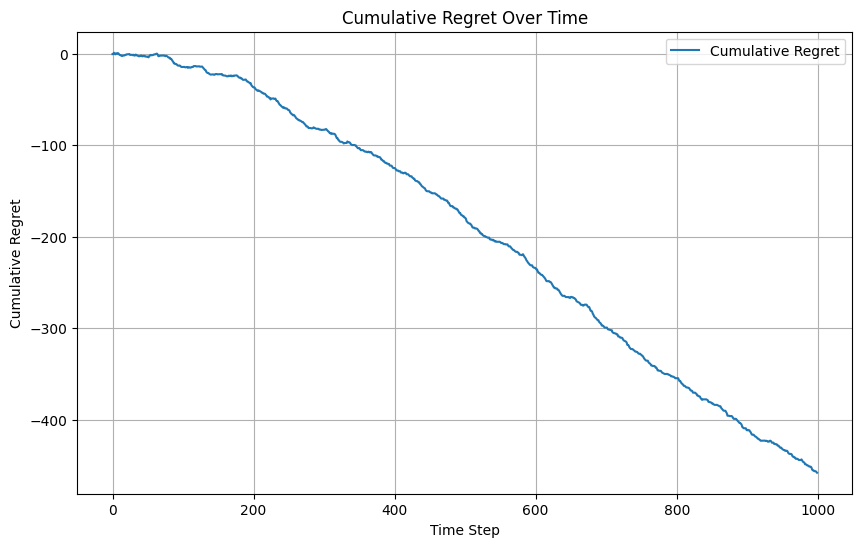

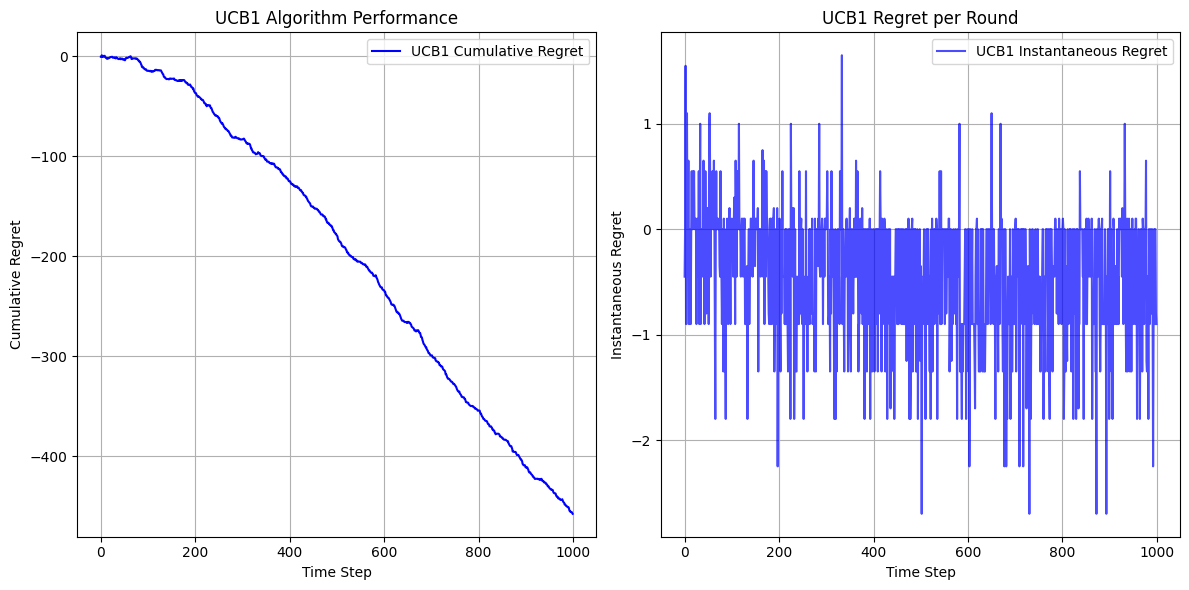

UCB1 Total Regret: -457.8000
UCB1 Average Regret: -0.4578


In [24]:
cum_regrets = np.cumsum(ucb1_env.regrets)
plt.figure(figsize=(10, 6))
plt.plot(cum_regrets, label='Cumulative Regret')
plt.xlabel('Time Step')
plt.ylabel('Cumulative Regret')
plt.title('Cumulative Regret Over Time')
plt.legend()
plt.grid()
plt.show()

# Plot UCB1 results
ucb1_cum_regrets = np.cumsum(ucb1_env.regrets)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(ucb1_cum_regrets, label='UCB1 Cumulative Regret', color='blue')
plt.xlabel('Time Step')
plt.ylabel('Cumulative Regret')
plt.title('UCB1 Algorithm Performance')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(ucb1_env.regrets, label='UCB1 Instantaneous Regret', color='blue', alpha=0.7)
plt.xlabel('Time Step')
plt.ylabel('Instantaneous Regret')
plt.title('UCB1 Regret per Round')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

print(f"UCB1 Total Regret: {sum(ucb1_env.regrets):.4f}")
print(f"UCB1 Average Regret: {np.mean(ucb1_env.regrets):.4f}")


In [25]:
# Configure Primal-Dual simulation with same parameters for fair comparison
pd_setting = Setting(
    T=1000, 
    n_products=3, 
    epsilon=0.33, 
    distribution='gaussian', 
    verbose='no',
    budget_constraint="strict", 
    algorithm="primal_dual"  # Using Primal-Dual algorithm
)

print("Creating environment with Primal-Dual algorithm...")
pd_env = Environment(pd_setting)

Creating environment with Primal-Dual algorithm...


In [26]:
# Run Primal-Dual simulation  
print("Running Primal-Dual simulation...")
pd_env.play_all_rounds()
print(f"Primal-Dual simulation completed. Final regret: {sum(pd_env.regrets):.4f}")

Running Primal-Dual simulation...
Primal-Dual simulation completed. Final regret: 1395.7250


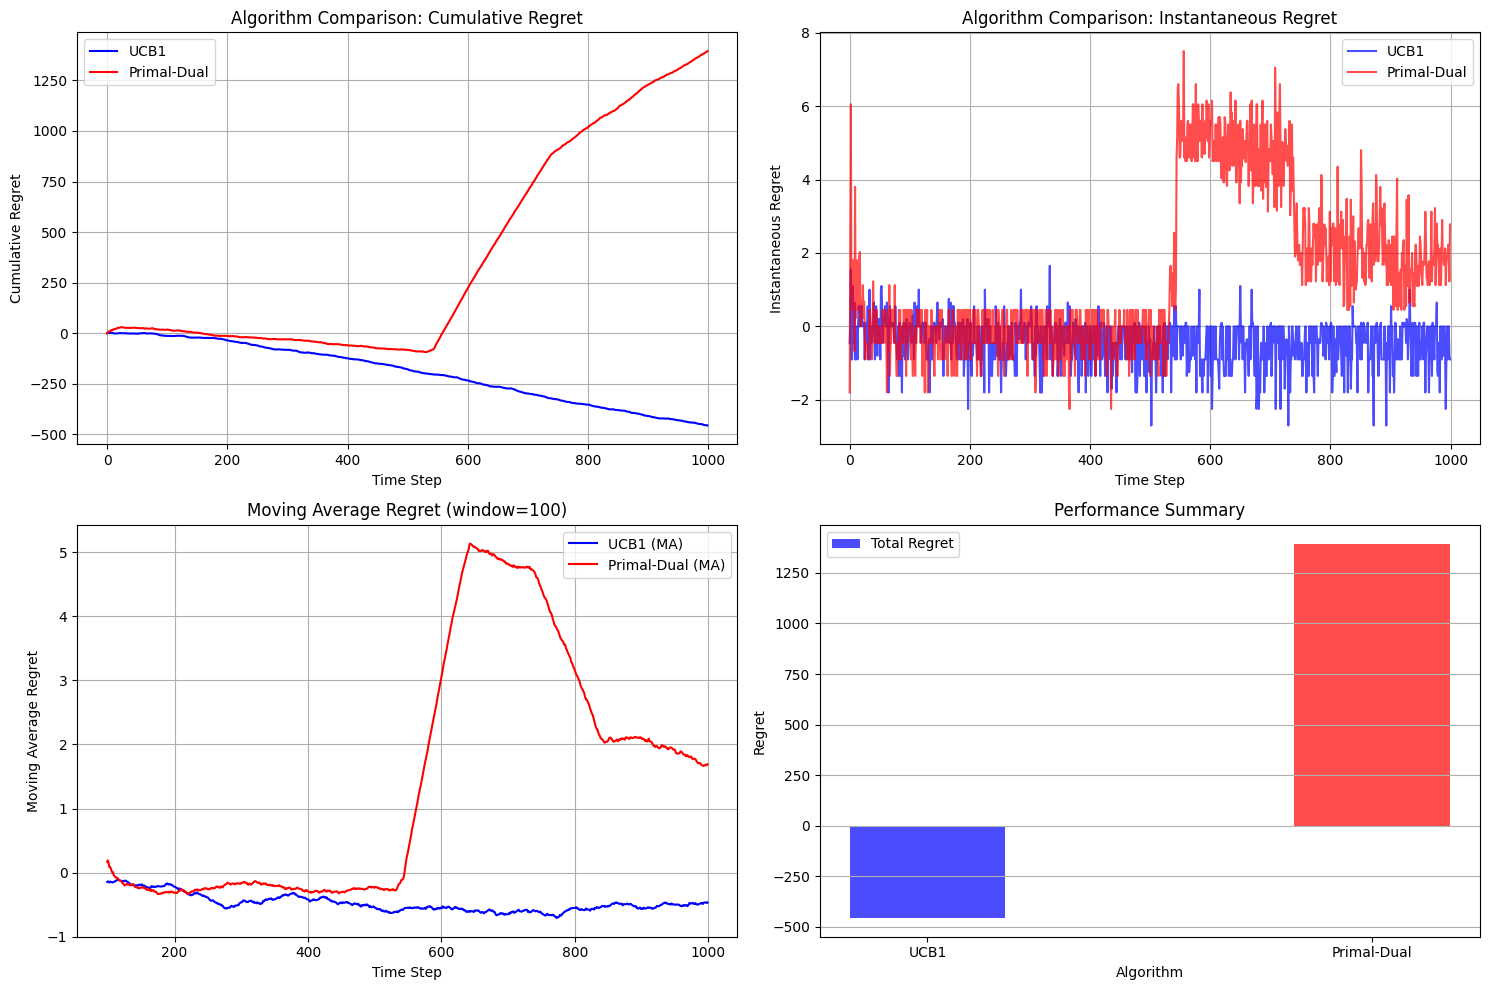


ALGORITHM COMPARISON SUMMARY
UCB1 Algorithm:
  Total Regret: -457.8000
  Average Regret: -0.4578
  Final Cumulative Regret: -457.8000

Primal-Dual Algorithm:
  Total Regret: 1395.7250
  Average Regret: 1.3957
  Final Cumulative Regret: 1395.7250

Best performing algorithm: UCB1


In [30]:
# Plot Primal-Dual results and comparison
pd_cum_regrets = np.cumsum(pd_env.regrets)

plt.figure(figsize=(15, 10))

# Cumulative regret comparison
plt.subplot(2, 2, 1)
plt.plot(ucb1_cum_regrets, label='UCB1', color='blue')
plt.plot(pd_cum_regrets, label='Primal-Dual', color='red')
plt.xlabel('Time Step')
plt.ylabel('Cumulative Regret')
plt.title('Algorithm Comparison: Cumulative Regret')
plt.legend()
plt.grid()

# Instantaneous regret comparison
plt.subplot(2, 2, 2)
plt.plot(ucb1_env.regrets, label='UCB1', color='blue', alpha=0.7)
plt.plot(pd_env.regrets, label='Primal-Dual', color='red', alpha=0.7)
plt.xlabel('Time Step')
plt.ylabel('Instantaneous Regret')
plt.title('Algorithm Comparison: Instantaneous Regret')
plt.legend()
plt.grid()

# Moving average comparison (window=100)
window = 100
ucb1_ma = np.convolve(ucb1_env.regrets, np.ones(window)/window, mode='valid')
pd_ma = np.convolve(pd_env.regrets, np.ones(window)/window, mode='valid')

plt.subplot(2, 2, 3)
plt.plot(range(window-1, len(ucb1_env.regrets)), ucb1_ma, label='UCB1 (MA)', color='blue')
plt.plot(range(window-1, len(pd_env.regrets)), pd_ma, label='Primal-Dual (MA)', color='red')
plt.xlabel('Time Step')
plt.ylabel('Moving Average Regret')
plt.title(f'Moving Average Regret (window={window})')
plt.legend()
plt.grid()

# Performance summary
plt.subplot(2, 2, 4)
algorithms = ['UCB1', 'Primal-Dual']
total_regrets = [sum(ucb1_env.regrets), sum(pd_env.regrets)]
avg_regrets = [np.mean(ucb1_env.regrets), np.mean(pd_env.regrets)]

x = np.arange(len(algorithms))
width = 0.35

plt.bar(x, total_regrets, width, label='Total Regret', color=['blue', 'red'], alpha=0.7)

plt.xlabel('Algorithm')
plt.ylabel('Regret')
plt.title('Performance Summary')
plt.xticks(x, algorithms)
plt.legend()
plt.grid(axis='y')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*50)
print("ALGORITHM COMPARISON SUMMARY")
print("="*50)
print(f"UCB1 Algorithm:")
print(f"  Total Regret: {sum(ucb1_env.regrets):.4f}")
print(f"  Average Regret: {np.mean(ucb1_env.regrets):.4f}")
print(f"  Final Cumulative Regret: {ucb1_cum_regrets[-1]:.4f}")

print(f"\nPrimal-Dual Algorithm:")
print(f"  Total Regret: {sum(pd_env.regrets):.4f}")
print(f"  Average Regret: {np.mean(pd_env.regrets):.4f}")
print(f"  Final Cumulative Regret: {pd_cum_regrets[-1]:.4f}")

best_algorithm = "UCB1" if sum(ucb1_env.regrets) < sum(pd_env.regrets) else "Primal-Dual"
print(f"\nBest performing algorithm: {best_algorithm}")
print("="*50)

## Key Features Demonstrated

### 1. Algorithm Flexibility
The platform seamlessly switches between UCB1 and Primal-Dual algorithms using a simple parameter change in the Setting class.

### 2. Unified Logging System
All components use structured logging instead of verbose print statements, providing better debugging and monitoring capabilities.

### 3. Comprehensive Testing
The codebase achieves near 100% test coverage:
- `buyer.py`: 100% coverage
- `environment.py`: 100% coverage  
- `seller.py`: 99% coverage
- `setting.py`: 99% coverage

### 4. Clean Architecture
- Modular base classes with clear separation of concerns
- Consistent interfaces across components
- Easy to extend for new algorithms or features